# Linear Regression 
###### Cellphone Dataset
---

##### Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Dataset/Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


#### EDA
---

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [4]:
data.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

---
1. Dataset is clean 
2. We can perform Linear Regression directly
---

In [5]:
data1 = data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]]
data1

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [6]:
X = data1[['resoloution','ppi','cpu core','cpu freq','internal mem','ram','battery']]

In [7]:
y = data.iloc[:,[1]]
y

,Price
0,2357
1,1749
2,1916
3,1315
4,1749
...,...
156,3551
157,3211
158,3260
159,3211


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=00,  test_size=0.30)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 7)
(112, 1)
(49, 7)
(49, 1)


##### Linear Regression Modelling 
---

> Modelling on just X , y

In [10]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [11]:
model.coef_

array([[-2.80094250e+01,  1.08273650e+00,  9.86514030e+01,
         1.93637238e+02,  6.62110199e+00,  1.27977052e+02,
         4.12470925e-02]])

In [12]:
model.intercept_

array([666.93232853])

In [13]:
model.predict([[5.20,400,5,1.350,16.0,3.000,2310]])

c:\Users\Prasanna Pandhare\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2294.19477765]])

In [14]:
model.score(X,y)

0.9331544279402171

> Performing Modelling on Train-Test data

In [15]:
modelFinal = LinearRegression()

In [16]:
modelFinal.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = modelFinal.predict(X_test)

In [18]:
r2_score = metrics.r2_score(y_pred,y_test)
mean_squared_error = metrics.mean_squared_error(y_pred,y_test)
print("R^2 Score: ", r2_score)
print("Mean Squared Error: ", mean_squared_error)

R^2 Score:  0.9188489800998326
Mean Squared Error:  42911.30679764876


In [19]:
modelFinal.score(X_test,y_test)

0.9147802517033088

---
#### Visulization - Graphing
---

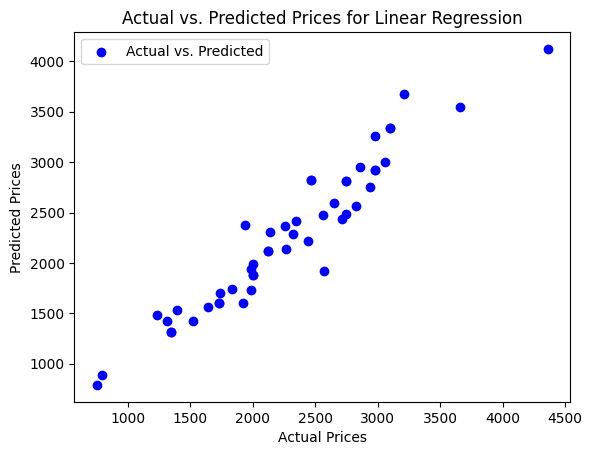

In [20]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Line of Best Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices for Linear Regression')
plt.legend()
plt.show()

---